# Libraries, Directory, Data

In [1]:
#Dependencies
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Pricing the C's of Diamond Stones
## Description
* a cross-section from 2000
* number of observations : 308
* observation : goods
* country : Singapore
##Usage
* data(Diamond)


## Format
### A dataframe containing :
#### carat
  weight of diamond stones in carat unit
#### colour
  a factor with levels (D,E,F,G,H,I)
#### clarity
  a factor with levels (IF,VVS1,VVS2,VS1,VS2)
#### certification
  certification body, a factor with levels ( GIA, IGI, HRD)
#### price
  price in Singapore \$
## Source
  Chu, Singfat (2001) “Pricing the C's of Diamond Stones”, Journal of Statistics Education, 9(2).

In [2]:
df = pd.read_csv('/kaggle/input/dimond-data-set/diamond.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Preperation

In [3]:
#Isolate X and Y
y = df.price
X = df.carat

In [4]:
#Adding Constant
X = sm.add_constant(X)
X.head(2)

,const,carat
0,1.0,0.23
1,1.0,0.21


# Linear Regression

In [5]:
#Regression Model
model1 = sm.OLS(endog = y, exog = X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:11   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

Text(0, 0.5, 'Price')

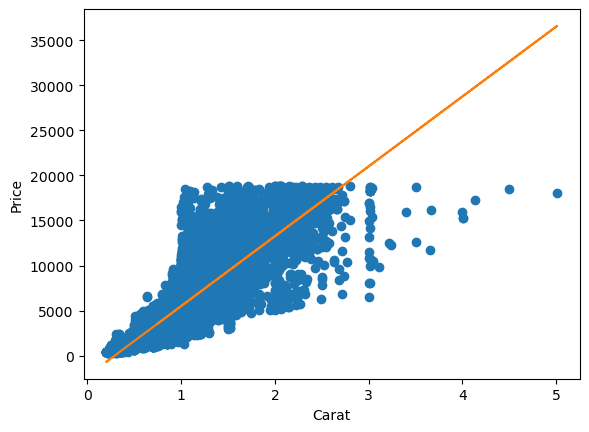

In [6]:
#Plotting
X = df.carat
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b*X + a)
plt.xlabel('Carat')
plt.ylabel('Price')

# Linear Regression with dummy variable

In [7]:
#Look at Carat Variable
df.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [8]:
#Create binary variable
df['carat_binary'] = np.where(df.carat > 0.6, 1, 0)
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_binary
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0


In [9]:
#Linear Regression with binary variable and plot

#Isolate X, y
X = df.carat_binary
y = df.price

In [10]:
X = sm.add_constant(X)

In [11]:
model2 = sm.OLS(endog = y, exog = X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 4.176e+04
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:12   Log-Likelihood:            -5.0831e+05
No. Observations:               53940   AIC:                         1.017e+06
Df Residuals:                   53938   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1038.4328     19.156     54.210   

Text(0, 0.5, 'Price')

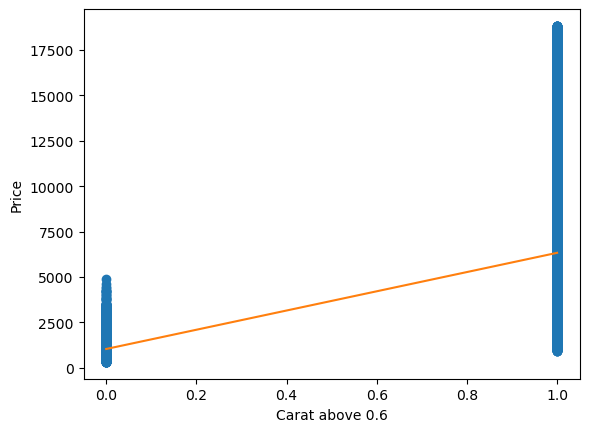

In [12]:
#Plot
X = df.carat_binary
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b*X + a)
plt.xlabel('Carat above 0.6')
plt.ylabel('Price')